### 앙상블
- 여러개의 분류 모델을 조합해서 더 나은 성능을 내는 방법

### RandomForest
: 의사결정트리를 bagging(단일 모델 조합)해서 예측을 실행하는 모델

In [1]:
from sklearn import datasets
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

In [3]:
# 손글씨 데이터
mnist = datasets.load_digits()

feature, labels = mnist.data, mnist.target


In [ ]:
# 의사결정 나무를 이용한 교차검증 10번 실시

cv_scores = []

for _ in range(10):
    scores = cross_val_score(tree.DecisionTreeClassifier(),
                            feature,
                            labels,
                            cv=10,
                            scoring='accuracy',
                            )
    cv_scores.append(scores.mean())

cv_scores

[0.8269087523277466,
 0.8230291744258225,
 0.8291371818746119,
 0.8241154562383614,
 0.8302576039726878,
 0.8263283674736188,
 0.8230198634388579,
 0.8263469894475481,
 0.8219025450031037,
 0.8302420856610799]

In [10]:
# Random Forest를 이용한 교차검증 10번 실시

cv_scores = []

for _ in range(10):
    scores = cross_val_score(RandomForestClassifier(),
                            feature,
                            labels,
                            cv=10,
                            scoring='accuracy',
                            )
    cv_scores.append(scores.mean())

cv_scores

[0.9510335195530726,
 0.9499037864680322,
 0.9482402234636871,
 0.9549317194289261,
 0.9504748603351955,
 0.9538081936685288,
 0.9482402234636871,
 0.952129112352576,
 0.9521384233395406,
 0.9510304158907511]

In [11]:
# func
def cv10scores(feature, labels, model):
    cv_scores = []

    for _ in range(10):
        scores = cross_val_score(model,
                                feature,
                                labels,
                                cv=10,
                                scoring='accuracy',
                                )
        cv_scores.append(scores.mean())
    return cv_scores

In [13]:
rfcScores = cv10scores(feature, labels, RandomForestClassifier())
decScores = cv10scores(feature, labels, tree.DecisionTreeClassifier())

In [14]:
import seaborn as sns

<Axes: >

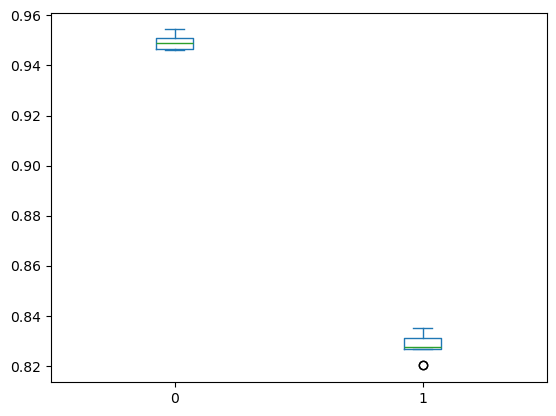

In [26]:
pd.DataFrame([
        rfcScores,
        decScores
    ]
).T.plot(
    kind='box'
)


In [27]:
np.mean(decScores)

0.8279729981378026

In [29]:
np.mean(rfcScores)

0.9493559900682804

---
### 보팅(Voting)앙상블
: 단일 모델을 앙상블하여 더 나은 예측하는 모델 생성

In [35]:
from sklearn import datasets
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


import numpy as np
np.random.seed(42)


In [36]:
mnist = datasets.load_digits()

In [38]:
features, labels = mnist.data, mnist.target

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(
                                                    features,
                                                    labels,
                                                    random_state=42,
                                                    test_size=0.2,
                                                    stratify=labels,
)

### 단일 모델 정확도 측정

In [55]:
# 의사결정 나무
dtree = tree.DecisionTreeClassifier().fit(X_train, Y_train)
dtree_pred = dtree.predict(X_test)


# KNN
knn = KNeighborsClassifier().fit(X_train, Y_train)
knn_pred = knn.predict(X_test)

# SVM
svm = SVC(probability=True).fit(X_train, Y_train)
svm_pred = svm.predict(X_test)

In [43]:

print("Decision Tree    : ", accuracy_score(Y_test, dtree_pred))
print("KNN              : ", accuracy_score(Y_test, knn_pred))
print("SVM              : ", accuracy_score(Y_test, svm_pred))

Decision Tree    :  0.8222222222222222
KNN              :  0.9833333333333333
SVM              :  0.9916666666666667


### 하드보팅
: 각각의 분류기의 예측값들을 모아, 가장 많은 득표를 받은 예측값으로 최종 결론을 내는 방식

In [52]:
voting_clf = VotingClassifier(
                estimators=[('decision tree', dtree), ('knn', knn), ('svm', svm)],
                weights=[1, 2, 4],
                voting='hard',
).fit(X_train, Y_train)

hard_voting_pred = voting_clf.predict(X_test)
accuracy_score(Y_test, hard_voting_pred) 

0.9916666666666667

### 소프트 보팅
: 소프트 보팅은 각각의 분류모델을 활용하여 모든 분류값드르이 확률들을 더해서 가장 높은 점수를 획득한 분류값으로 최종 결론을 내는 방식


In [ ]:
voting_clf = VotingClassifier(
                estimators=[('decision tree', dtree), ('knn', knn), ('svm', svm)],
                weights=[1, 2, 4],
                voting='soft',
).fit(X_train, Y_train)

hard_voting_pred = voting_clf.predict(X_test)
accuracy_score(Y_test, hard_voting_pred)

0.9861111111111112